In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.optimize import least_squares

In [64]:
class Pose:
    def __init__(self, x, y, theta):
        self.x = x
        self.y = y
        self.theta = theta

def create_ground_truth(num_poses):
    gt_poses = []
    for i in range(num_poses):
        x = i * 1.0
        y = np.sin(i / 3.0) * 2.0
        theta = i * 0.1
        gt_poses.append(Pose(x, y, theta))
    return gt_poses

def add_noise_to_poses(gt_poses, motion_noise):
    noisy_poses = []
    for pose in gt_poses:
        noisy_x = pose.x + np.random.normal(0, motion_noise)
        noisy_y = pose.y + np.random.normal(0, motion_noise)
        noisy_theta = pose.theta + np.random.normal(0, motion_noise/10)
        noisy_poses.append(Pose(noisy_x, noisy_y, noisy_theta))
    return noisy_poses

def create_odometry_edges(poses):
    edges = []
    for i in range(len(poses)-1):
        dx = poses[i+1].x - poses[i].x
        dy = poses[i+1].y - poses[i].y
        dtheta = poses[i+1].theta - poses[i].theta
        edges.append((i, i+1, dx, dy, dtheta))
    return edges

def create_loop_closure_edges(poses, distance_threshold):
    edges = []
    for i in range(len(poses)):
        for j in range(i+2, len(poses)):
            dist = np.sqrt((poses[i].x-poses[j].x)**2 + (poses[i].y-poses[j].y)**2)
            if dist < distance_threshold:
                dx = poses[j].x - poses[i].x
                dy = poses[j].y - poses[i].y
                dtheta = poses[j].theta - poses[i].theta
                edges.append((i, j, dx, dy, dtheta))
    return edges


In [70]:
def residual_function(params, odom_edges, lc_edges, num_poses):
    residuals = []
    poses = []
    for i in range(num_poses):
        x = params[3*i]
        y = params[3*i + 1]
        theta = params[3*i + 2]
        poses.append(Pose(x, y, theta))
    
    for edge in odom_edges:
        i, j, dx, dy, dtheta = edge
        pred_dx = poses[j].x - poses[i].x
        pred_dy = poses[j].y - poses[i].y
        pred_dtheta = poses[j].theta - poses[i].theta
        
        residuals.append(pred_dx - dx)
        residuals.append(pred_dy - dy)
        residuals.append(pred_dtheta - dtheta)
    
    for edge in lc_edges:
        i, j, dx, dy, dtheta = edge
        pred_dx = poses[j].x - poses[i].x
        pred_dy = poses[j].y - poses[i].y
        pred_dtheta = poses[j].theta - poses[i].theta
        
        residuals.append(pred_dx - dx)
        residuals.append(pred_dy - dy)
        residuals.append(pred_dtheta - dtheta)
    
    return np.array(residuals)

`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 0.0000e+00, final cost 0.0000e+00, first-order optimality 0.00e+00.


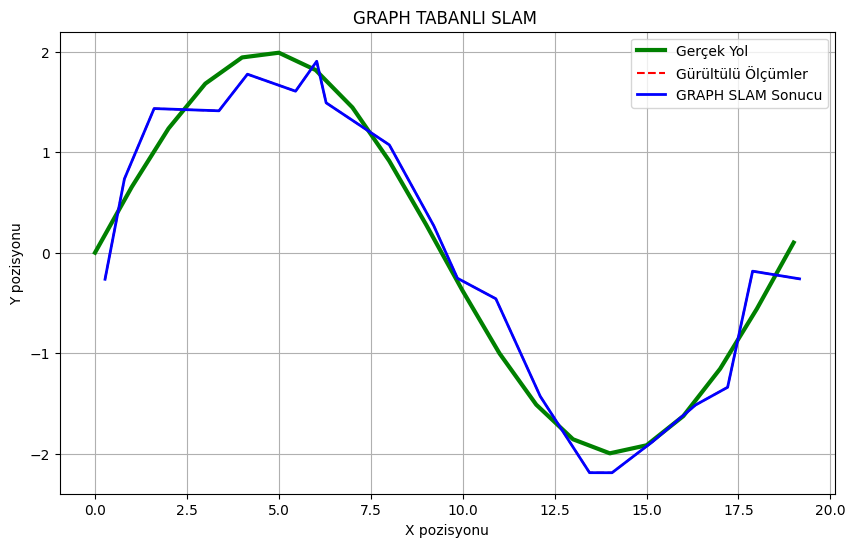

In [67]:
def run_graph_slam():
    num_poses = 20
    motion_noise = 0.3
    loop_closure_dist = 3.0
    
    gt_poses = create_ground_truth(num_poses)
    noisy_poses = add_noise_to_poses(gt_poses, motion_noise)
    odom_edges = create_odometry_edges(noisy_poses)
    lc_edges = create_loop_closure_edges(noisy_poses, loop_closure_dist)
    
    initial_params = []
    for pose in noisy_poses:
        initial_params.extend([pose.x, pose.y, pose.theta])
    initial_params = np.array(initial_params)
    
    result = least_squares(
        fun=residual_function,
        x0=initial_params,
        args=(odom_edges, lc_edges, num_poses),
        verbose=1
    )
    
    optimized_poses = []
    for i in range(num_poses):
        x = result.x[3*i]
        y = result.x[3*i + 1]
        theta = result.x[3*i + 2]
        optimized_poses.append(Pose(x, y, theta))
    

    plt.figure(figsize=(10, 6))
    

    gt_x = [p.x for p in gt_poses]
    gt_y = [p.y for p in gt_poses]
    plt.plot(gt_x, gt_y, 'g-', linewidth=3, label='Gerçek Yol')
    

    noisy_x = [p.x for p in noisy_poses]
    noisy_y = [p.y for p in noisy_poses]
    plt.plot(noisy_x, noisy_y, 'r--', label='Gürültülü Ölçümler')
    
    opt_x = [p.x for p in optimized_poses]
    opt_y = [p.y for p in optimized_poses]
    plt.plot(opt_x, opt_y, 'b-', linewidth=2, label='GRAPH SLAM Sonucu')
    
    plt.legend()
    plt.title('GRAPH TABANLI SLAM ')
    plt.xlabel('X pozisyonu')
    plt.ylabel('Y pozisyonu')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    run_graph_slam()

`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 0.0000e+00, final cost 0.0000e+00, first-order optimality 0.00e+00.


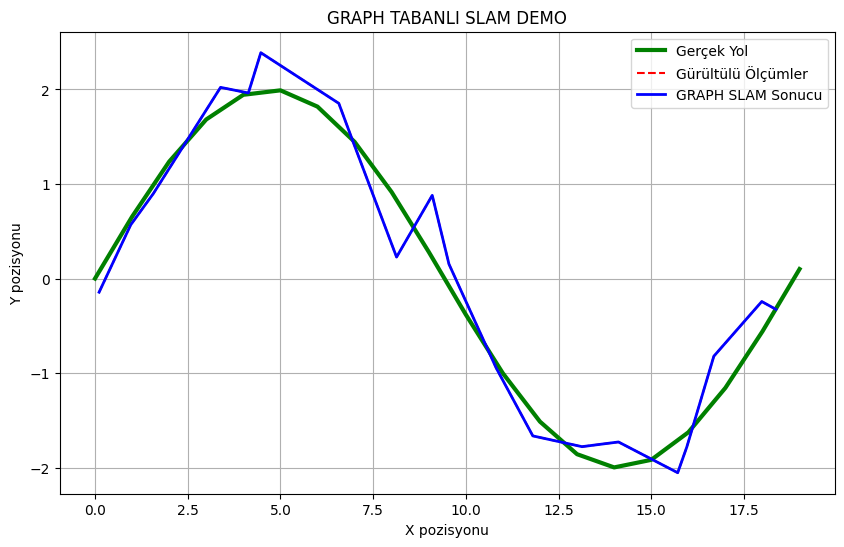

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.optimize import least_squares

class Pose:
    def __init__(self, x, y, theta):
        self.x = x
        self.y = y
        self.theta = theta

def create_ground_truth(num_poses):
    gt_poses = []
    for i in range(num_poses):
        x = i * 1.0
        y = np.sin(i / 3.0) * 2.0
        theta = i * 0.1
        gt_poses.append(Pose(x, y, theta))
    return gt_poses

def add_noise_to_poses(gt_poses, motion_noise):
    noisy_poses = []
    for pose in gt_poses:
        noisy_x = pose.x + np.random.normal(0, motion_noise)
        noisy_y = pose.y + np.random.normal(0, motion_noise)
        noisy_theta = pose.theta + np.random.normal(0, motion_noise/10)
        noisy_poses.append(Pose(noisy_x, noisy_y, noisy_theta))
    return noisy_poses

def create_odometry_edges(poses):
    edges = []
    for i in range(len(poses)-1):
        dx = poses[i+1].x - poses[i].x
        dy = poses[i+1].y - poses[i].y
        dtheta = poses[i+1].theta - poses[i].theta
        edges.append((i, i+1, dx, dy, dtheta))
    return edges

def create_loop_closure_edges(poses, distance_threshold):
    edges = []
    for i in range(len(poses)):
        for j in range(i+2, len(poses)):
            dist = np.sqrt((poses[i].x-poses[j].x)**2 + (poses[i].y-poses[j].y)**2)
            if dist < distance_threshold:
                dx = poses[j].x - poses[i].x
                dy = poses[j].y - poses[i].y
                dtheta = poses[j].theta - poses[i].theta
                edges.append((i, j, dx, dy, dtheta))
    return edges

def residual_function(params, odom_edges, lc_edges, num_poses):
    residuals = []
    poses = []
    for i in range(num_poses):
        x = params[3*i]
        y = params[3*i + 1]
        theta = params[3*i + 2]
        poses.append(Pose(x, y, theta))
    
    for edge in odom_edges:
        i, j, dx, dy, dtheta = edge
        pred_dx = poses[j].x - poses[i].x
        pred_dy = poses[j].y - poses[i].y
        pred_dtheta = poses[j].theta - poses[i].theta
        
        residuals.append(pred_dx - dx)
        residuals.append(pred_dy - dy)
        residuals.append(pred_dtheta - dtheta)
    
    for edge in lc_edges:
        i, j, dx, dy, dtheta = edge
        pred_dx = poses[j].x - poses[i].x
        pred_dy = poses[j].y - poses[i].y
        pred_dtheta = poses[j].theta - poses[i].theta
        
        residuals.append(pred_dx - dx)
        residuals.append(pred_dy - dy)
        residuals.append(pred_dtheta - dtheta)
    
    return np.array(residuals)

def run_graph_slam():
    num_poses = 20
    motion_noise = 0.3
    loop_closure_dist = 3.0
    
    gt_poses = create_ground_truth(num_poses)
    noisy_poses = add_noise_to_poses(gt_poses, motion_noise)
    odom_edges = create_odometry_edges(noisy_poses)
    lc_edges = create_loop_closure_edges(noisy_poses, loop_closure_dist)
    
    initial_params = []
    for pose in noisy_poses:
        initial_params.extend([pose.x, pose.y, pose.theta])
    initial_params = np.array(initial_params)
    
    result = least_squares(
        fun=residual_function,
        x0=initial_params,
        args=(odom_edges, lc_edges, num_poses),
        verbose=1
    )
    
    optimized_poses = []
    for i in range(num_poses):
        x = result.x[3*i]
        y = result.x[3*i + 1]
        theta = result.x[3*i + 2]
        optimized_poses.append(Pose(x, y, theta))
    

    plt.figure(figsize=(10, 6))
    

    gt_x = [p.x for p in gt_poses]
    gt_y = [p.y for p in gt_poses]
    plt.plot(gt_x, gt_y, 'g-', linewidth=3, label='Gerçek Yol')
    

    noisy_x = [p.x for p in noisy_poses]
    noisy_y = [p.y for p in noisy_poses]
    plt.plot(noisy_x, noisy_y, 'r--', label='Gürültülü Ölçümler')
    
    opt_x = [p.x for p in optimized_poses]
    opt_y = [p.y for p in optimized_poses]
    plt.plot(opt_x, opt_y, 'b-', linewidth=2, label='GRAPH SLAM Sonucu')
    
    plt.legend()
    plt.title('GRAPH TABANLI SLAM ')
    plt.xlabel('X pozisyonu')
    plt.ylabel('Y pozisyonu')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    run_graph_slam()